In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("heart.csv")
df.head() # veri seti yüklendi ve ilk 5 satırına bakıldı. 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.info()# veri tipine baktım ve hepsinin nümeric değerler olduğunu buldum. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
df.isnull().sum()# veri setinde boş değerler var mı diye bakıldı ama yok, bu baya iyi bir şey. 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
import pandas as pd

df = pd.read_csv('heart.csv')  # Bu, veri setinizi yüklediğiniz yerdir

# Sütun adlarını güncelledim.
df.columns = [
    'yas', 'cinsiyet', 'gogus_agrisi_tipi', 'dinlenme_kan_basinci', 'kolestrol', 
    'aclik_kan_sekeri', 'istirahat_EKG_sonuclari', 'maksimum_kalp_hizi', 
    'egzersiz_induklu_anjina', 'st_depresyonu', 'egzersiz_ST_egrisi', 
    'ana_damarlar', 'talasemi', 'kalp_hastasi'
]

# Güncellenmiş veri çerçevesini yeni bir CSV dosyasına kaydedin
df.to_csv('updated_heart.csv', index=False)

print("Sütun adları güncellendi ve yeni CSV dosyası kaydedildi.")

Sütun adları güncellendi ve yeni CSV dosyası kaydedildi.


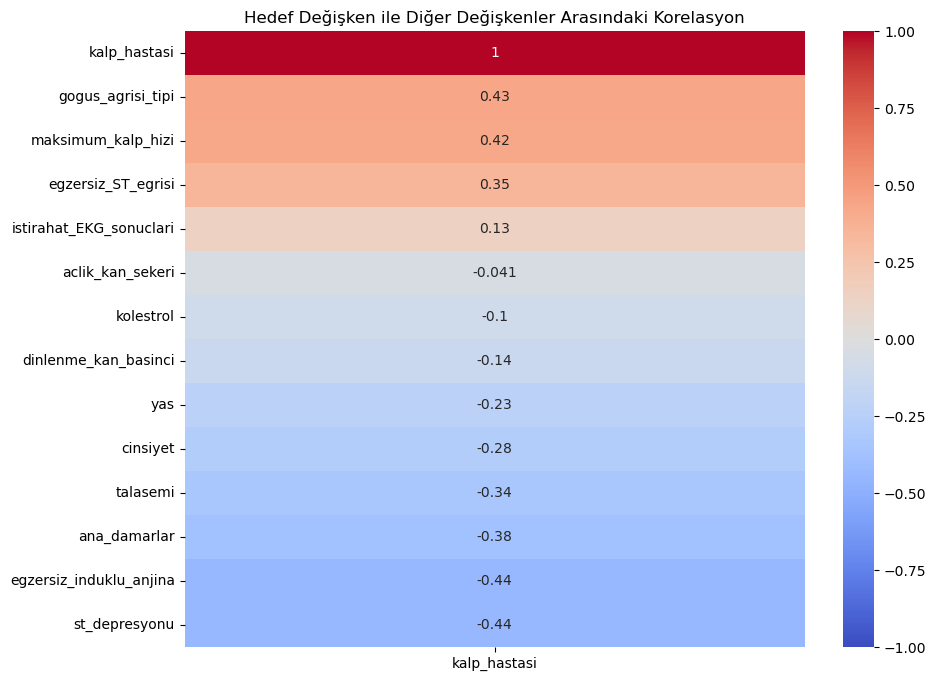

In [5]:
correlation_matrix = df.corr()

# Hedef değişkenin diğer değişkenlerle korelasyonunu seçme
target_correlation = correlation_matrix['kalp_hastasi']

# Isı haritasını oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation.sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hedef Değişken ile Diğer Değişkenler Arasındaki Korelasyon')
plt.show()

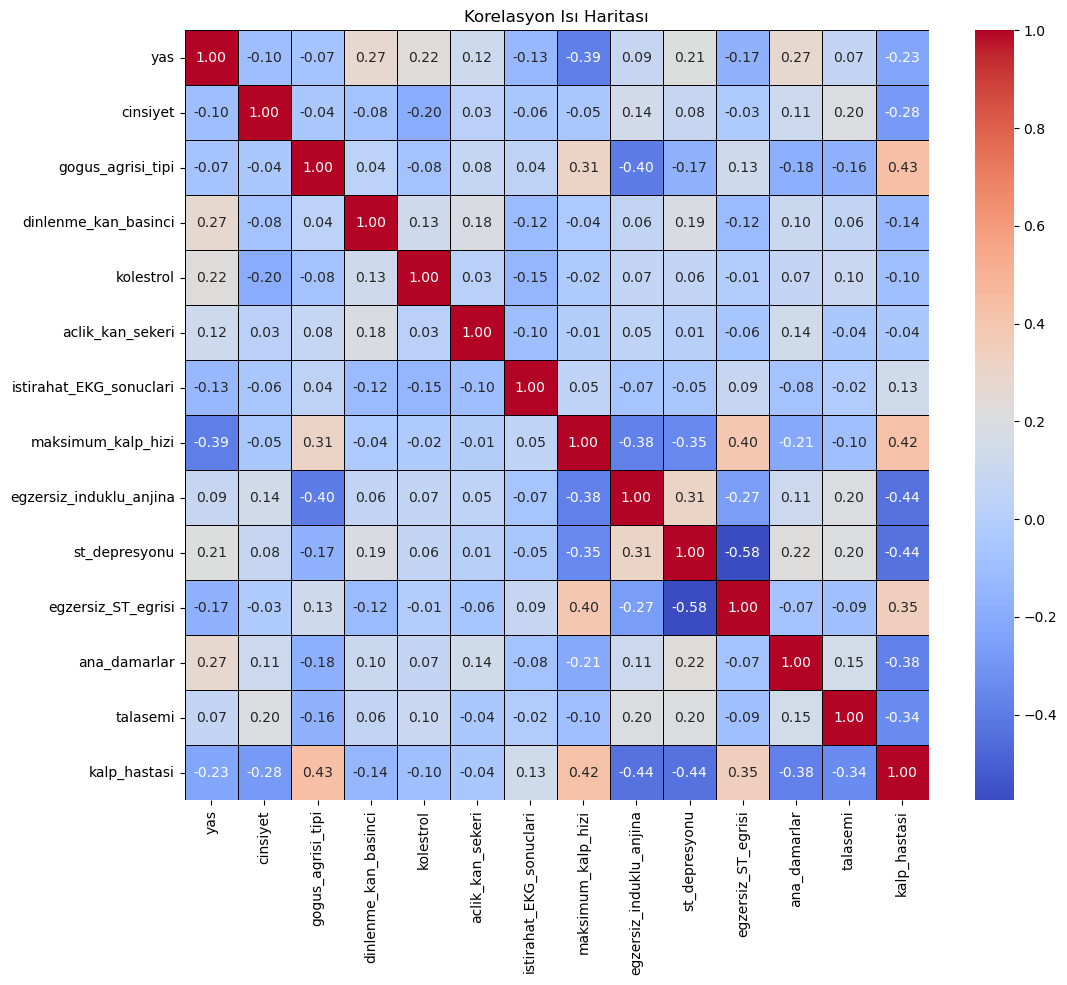

In [6]:
correlation_matrix = df.corr()

# Korelasyon ısı haritasını oluşturdum.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Korelasyon Isı Haritası')
plt.show()

In [7]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Veri setini yükledim.
df = pd.read_csv('updated_heart.csv')  # Bu, veri setinizi yüklediğiniz yerdir

# Özellikler ve hedef değişkeni belirleyerek x ve y olarak ayırdım. 
X = df.drop(columns=['kalp_hastasi'])
y = df['kalp_hastasi']

# Eğitim ve test setlerine ayırma işlemi yapıldı.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartlaştırıcıyı oluşturdum ve eğitim yapıldı.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Modeli oluşturuldu ve eğitim yapıldı. 
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Modeli ve scaler'ı kaydetme işlemi yapıldı. 
joblib.dump(model, 'heart.pkl')
joblib.dump(scaler, 'heartscaler.pkl')

['heartscaler.pkl']

In [8]:
import pandas as pd
import joblib

# Modeli ve scaler'ı yükledim.
model = joblib.load('heart.pkl')
scaler = joblib.load('heartscaler.pkl')

# Test verisini oluşturdum tahmin yapmak için
test_data = pd.DataFrame({
    'yas': [58, 60],
    'cinsiyet': [0, 0],
    'gogus_agrisi_tipi': [0, 1],
    'dinlenme_kan_basinci': [100, 140],
    'kolestrol': [248, 300],
    'aclik_kan_sekeri': [0, 1],
    'istirahat_EKG_sonuclari': [0, 0],
    'maksimum_kalp_hizi': [122, 130],
    'egzersiz_induklu_anjina': [0, 1],
    'st_depresyonu': [1.0, 2.0],
    'egzersiz_ST_egrisi': [1, 0],
    'ana_damarlar': [0, 2],
    'talasemi': [2, 1]
})


feature_columns = [
    'yas', 'cinsiyet', 'gogus_agrisi_tipi', 'dinlenme_kan_basinci', 'kolestrol',
    'aclik_kan_sekeri', 'istirahat_EKG_sonuclari', 'maksimum_kalp_hizi',
    'egzersiz_induklu_anjina', 'st_depresyonu', 'egzersiz_ST_egrisi',
    'ana_damarlar', 'talasemi'
]
X_test = test_data[feature_columns]

# Test verisini standartlaştırdım sclaer ile 
X_test_scaled = scaler.transform(X_test)

# Tahmin yapıldı.
predictions = model.predict(X_test_scaled)

# Tahminleri yazdırdım.
print('Örnek Tahminler:', predictions)


Örnek Tahminler: [1 0]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
import pandas as pd

# Test verisini yükleyin veya hazırlayın (burada örnek olarak bir veri yükleniyor)
test_data = pd.DataFrame({
    'yas': [58, 60],
    'cinsiyet': [0, 0],
    'gogus_agrisi_tipi': [0, 1],
    'dinlenme_kan_basinci': [100, 140],
    'kolestrol': [248, 300],
    'aclik_kan_sekeri': [0, 1],
    'istirahat_EKG_sonuclari': [0, 0],
    'maksimum_kalp_hizi': [122, 130],
    'egzersiz_induklu_anjina': [0, 1],
    'st_depresyonu': [1.0, 2.0],
    'egzersiz_ST_egrisi': [1, 0],
    'ana_damarlar': [0, 2],
    'talasemi': [2, 1]
})

# Gerçek etiketler (örneğin)
y_test = [0, 1]  # İlk kişi hasta değil, ikinci kişi hasta

feature_columns = [
    'yas', 'cinsiyet', 'gogus_agrisi_tipi', 'dinlenme_kan_basinci', 'kolestrol',
    'aclik_kan_sekeri', 'istirahat_EKG_sonuclari', 'maksimum_kalp_hizi',
    'egzersiz_induklu_anjina', 'st_depresyonu', 'egzersiz_ST_egrisi',
    'ana_damarlar', 'talasemi'
]
X_test = test_data[feature_columns]

# Model ve scaler'ı yükle
model = joblib.load('heart.pkl')
scaler = joblib.load('heartscaler.pkl')

# Veriyi ölçeklendirin
X_test_scaled = scaler.transform(X_test)

# Tahmin yapın
y_pred = model.predict(X_test_scaled)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Detaylı rapor
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Veri Setini Yükle ve Ön İşlemleri Yap
data = pd.read_csv('updated_heart.csv')

# Özellikler ve hedef değişken
X = data.drop('kalp_hastasi', axis=1)  # 'target' burada kalp hastalığı etiketinizi temsil eder
y = data['kalp_hastasi']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Modelleri Tanımla
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# 3. Modelleri Eğit ve Karşılaştır
results = {}

for model_name, model in models.items():
    # Modeli eğit
    model.fit(X_train_scaled, y_train)
    
    # Test seti üzerinde tahmin yap
    y_pred = model.predict(X_test_scaled)
    
    # Performans metriklerini hesapla
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Sonuçları kaydet
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# 4. Sonuçları Karşılaştır ve En İyi Modeli Seç
results_df = pd.DataFrame(results).T
print(results_df)

# En iyi modeli seçmek
best_model = results_df['F1 Score'].idxmax()
print(f"\nEn iyi model: {best_model}")

                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.795122   0.756303  0.873786  0.810811
Decision Tree           0.985366   1.000000  0.970874  0.985222
Random Forest           0.985366   1.000000  0.970874  0.985222
Support Vector Machine  0.887805   0.850877  0.941748  0.894009
K-Nearest Neighbors     0.834146   0.800000  0.893204  0.844037

En iyi model: Decision Tree
